In [20]:
import re
import numpy as np
import pandas as pd
from pprint import pprint

# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

# spacy for lemmatization
import spacy

# Plotting toolscc
import pyLDAvis
import pyLDAvis.gensim  # don't skip this
import matplotlib.pyplot as plt
%matplotlib inline

# Enable logging for gensim - optional
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)

import warnings
#warnings.filterwarnings("ignore",category=DeprecationWarning)
warnings.filterwarnings('ignore')  # To ignore all warnings that arise here to enhance clarity

import pickle

In [21]:
# NLTK Stop words
from nltk.corpus import stopwords
stop_words = stopwords.words('english')

#############################################################################################
stop_words.extend(['from', 'also', 'would', 'say', 'percent', 'year', 'mention', 'make_sure', 'enough',
                   'yet', 'next','instead','perhaps', 'purely','thompson', 'matthew', 'charle', 'october', 'onetime',  'olivia', 'come', 'mike',  'martin',  'poorly', 
                   'rainy_day',  'way', 'many', 'often', 'make', 'give',  'use',   'may','great', 'well',
                   'take', 'see', 'provide', 'time', 'example', 'good', 'feel', 'large', 'mark', 'include', 'sai', 'lalao', 'coffee', 'usaid',
                   'become', 'get', 'high', 'stay', 'day', 'cut', 'increase', 'even', 'number', 'organization', 'process', 'result', 'affiliate', 
                   'offer', 'ict', 'white', 'jackson','susan','go','first','second','frey','dam','oasis','less','must','much','more','need','low','find','clfs',
                  'center','report','performance','cause','mercury','class','likely','lean_data','pra','cherish_every','worldreader','solarnow','feedback',
                  'robin_hood','estimate','baco','furaha','graph','scott','know','consider','receive','safeco','part','mean','allow','set','reach','serve','begin',
                  'ask','question','fall','level','start','reduce','right','want','end','decision','find','place'])

In [24]:
with open("savecorpus.pkl", "rb") as f:
    corpus = pickle.load(f)
with open("data_lemmatized.pkl", "rb") as f:
    data_lemmatized = pickle.load(f)
with open("id2word.pkl", "rb") as f:
    id2word = pickle.load(f)

lda_model =  gensim.models.LdaModel.load('lda.model')

In [25]:
# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.013*"people" + 0.009*"foundation" + 0.009*"work" + 0.006*"program" + '
  '0.006*"funder" + 0.005*"grantee" + 0.004*"nonprofit" + 0.004*"support" + '
  '0.004*"community" + 0.004*"idea"'),
 (1,
  '0.014*"social" + 0.011*"innovation" + 0.009*"business" + 0.008*"market" + '
  '0.008*"company" + 0.007*"new" + 0.006*"create" + 0.005*"government" + '
  '0.005*"sector" + 0.004*"technology"'),
 (2,
  '0.013*"program" + 0.011*"design" + 0.009*"change" + 0.007*"system" + '
  '0.007*"group" + 0.007*"people" + 0.007*"help" + 0.006*"approach" + '
  '0.006*"work" + 0.006*"learn"'),
 (3,
  '0.020*"foundation" + 0.010*"investment" + 0.010*"donor" + 0.009*"social" + '
  '0.008*"philanthropy" + 0.008*"fund" + 0.006*"public" + 0.006*"impact" + '
  '0.006*"charity" + 0.006*"nonprofit"'),
 (4,
  '0.013*"program" + 0.009*"work" + 0.009*"community" + 0.008*"nonprofit" + '
  '0.007*"volunteer" + 0.007*"brand" + 0.006*"social" + 0.006*"health" + '
  '0.006*"service" + 0.006*"new"'),
 (5,
  '0.017*"sc

In [26]:
# Compute Perplexity
# a measure of how good the model is. lower the better.
print('\nPerplexity: ', lda_model.log_perplexity(corpus))

# Compute Coherence Score
coherence_model_lda = CoherenceModel(
    model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -8.385675391742083

Coherence Score:  0.38550224299614283


In [27]:
# Visualize the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1      0.063446 -0.042697       1        1  16.157387
0     -0.007594  0.068306       2        1  15.376398
9      0.055647  0.025058       3        1  13.473153
4      0.025106  0.059004       4        1  11.005464
3      0.041662 -0.043702       5        1  10.444271
7      0.053584 -0.023598       6        1   9.684854
2      0.039237  0.141304       7        1   7.697247
6     -0.015083 -0.105325       8        1   6.742250
8     -0.028207 -0.107942       9        1   6.032045
5     -0.227797  0.029590      10        1   3.386933, topic_info=     Category         Freq          Term        Total  loglift  logprob
1253  Default  2990.000000     nonprofit  2990.000000  30.0000  30.0000
338   Default  2245.000000    foundation  2245.000000  29.0000  29.0000
978   Default  1951.000000       company  1951.000000  28.0000  28.0000
1365  Default  1106.000000        school  1106.000000  27.0000  27.0000
635   Default  2520.000000       program  2520.000000  26.0000  26.0000
1419  Default   586.000000       student   586.000000  25.0000  25.0000
1430  Default   383.000000       teacher   383.000000  24.0000  24.0000
3501  Default   646.000000         woman   646.000000  23.0000  23.0000
105   Default  1967.000000      business  1967.000000  22.0000  22.0000
584   Default  2908.000000        people  2908.000000  21.0000  21.0000
427   Default  1210.000000    innovation  1210.000000  20.0000  20.0000
1624  Default   509.000000      consumer   509.000000  19.0000  19.0000
632   Default   882.000000       product   882.000000  18.0000  18.0000
225   Default   823.000000        design   823.000000  17.0000  17.0000
442   Default  1030.000000    investment  1030.000000  16.0000  16.0000
1211  Default  1195.000000        market  1195.000000  15.0000  15.0000
928   Default   501.000000         brand   501.000000  14.0000  14.0000
1945  Default   726.000000          poor   726.000000  13.0000  13.0000
865   Default  2713.000000          work  2713.000000  12.0000  12.0000
705   Default  1730.000000       service  1730.000000  11.0000  11.0000
595   Default   690.000000  philanthropy   690.000000  10.0000  10.0000
249   Default   911.000000         donor   911.000000   9.0000   9.0000
721   Default  3125.000000        social  3125.000000   8.0000   8.0000
2495  Default   470.000000     volunteer   470.000000   7.0000   7.0000
634   Default   768.000000        profit   768.000000   6.0000   6.0000
6274  Default   339.000000        merger   339.000000   5.0000   5.0000
260   Default   736.000000     education   736.000000   4.0000   4.0000
2678  Default   452.000000          loan   452.000000   3.0000   3.0000
2928  Default   266.000000  microfinance   266.000000   2.0000   2.0000
127   Default   805.000000         child   805.000000   1.0000   1.0000
...       ...          ...           ...          ...      ...      ...
3333  Topic10    65.922028        parent   228.908142   2.1404  -5.5758
260   Topic10   132.161133     education   736.127197   1.6679  -4.8803
3901  Topic10    26.794907       theater    61.257069   2.5584  -6.4761
6937  Topic10    14.450109    credential    22.143850   2.9584  -7.0936
1429  Topic10    55.406769         teach   244.350525   1.9013  -5.7496
127   Topic10   102.932396         child   805.181396   1.3283  -5.1302
5810  Topic10    28.002357          wage    73.425537   2.4213  -6.4320
865   Topic10   174.752533          work  2713.154297   0.6427  -4.6009
2529  Topic10    33.317226        attend   107.127457   2.2173  -6.2582
1820  Topic10    60.857193           job   417.256042   1.4601  -5.6558
584   Topic10   137.604431        people  2908.825684   0.3341  -4.8399
1570  Topic10    65.758705       capital   552.168335   1.2574  -5.5783
3274  Topic10    38.523781           kid   165.781708   1.9258  -6.1130
3045  Topic10    59.167618      american   536.333984   1.1809  -5.68

In [28]:
#save pyLDAvis image
pyLDAvis.save_html(vis,'lda.html')

### What is the Dominant topic and its percentage contribution in each document.

In [29]:
data=[]
def format_topics_sentences(ldamodel=None, corpus=corpus, texts=data):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row_list in enumerate(ldamodel[corpus]):
        row = row_list[0] if ldamodel.per_word_topics else row_list            
        # print(row)
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)


df_topic_sents_keywords = format_topics_sentences(ldamodel=lda_model, corpus=corpus, texts=data_lemmatized)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']
df_dominant_topic.head(10)

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,9.0,0.6517,"change, work, policy, system, issue, network, group, strategy, advocacy, leader","[big, deal, conservation, larry, linden, steve, mccormick, ivan_barkhorn, roger, ullman, guiller..."
1,1,9.0,0.4072,"change, work, policy, system, issue, network, group, strategy, advocacy, leader","[john_kania, kramer, winter, university, leader, local, agree, participate, head, influential, p..."
2,2,1.0,0.6266,"social, innovation, business, market, company, new, create, government, sector, technology","[create, social, value, philip, auerswald, spring, rights_reserv, memorial, social, value, phili..."
3,3,0.0,0.9995,"people, foundation, work, program, funder, grantee, nonprofit, support, community, idea","[luck, draw, bolduc, phil_buchanan, elliebuteau, spring, rights_reserv, kevin, bolduc, phil_buch..."
4,4,9.0,0.6315,"change, work, policy, system, issue, network, group, strategy, advocacy, leader","[partnership, learn, manage, tension, nonprofit, alliance, corporation, denni, rondinelli, right..."
5,5,1.0,0.6248,"social, innovation, business, market, company, new, create, government, sector, technology","[reshape, social, paul, light, reserved, social, synonymous, individual, visionary, risk, taker,..."
6,6,4.0,0.5105,"program, work, community, nonprofit, volunteer, brand, social, health, service, new","[social, case, definition, roger, sally_osberg, spring, rights_reserv, muhammad_yunus, access, s..."
7,7,0.0,0.9997,"people, foundation, work, program, funder, grantee, nonprofit, support, community, idea","[spark, nonprofit, innovation, weird, management, idea, work, robert, sutton, rights_reserv, cop..."
8,8,9.0,0.7230,"change, work, policy, system, issue, network, group, strategy, advocacy, leader","[dawn, system, leadership, peter_senge, hal, hamilton, leland_stanford, rights_reserv, winter, d..."
9,9,9.0,0.9996,"change, work, policy, system, issue, network, group, strategy, advocacy, leader","[hide, cost, paradise, displace, create, wilderness, area, detriment, dowie, spring, rights_rese..."


In [30]:
#save data to excel
df_dominant_topic.to_excel('dominant_topic.xlsx')

### The most representative sentence for each topic

In [31]:
# Display setting to show more characters in column
pd.options.display.max_colwidth = 100

sent_topics_sorteddf = pd.DataFrame()
sent_topics_outdf_grpd = df_topic_sents_keywords.groupby('Dominant_Topic')

for i, grp in sent_topics_outdf_grpd:
    sent_topics_sorteddf = pd.concat([sent_topics_sorteddf, 
                                             grp.sort_values(['Perc_Contribution'], ascending=False).head(1)], 
                                            axis=0)

# Reset Index    
sent_topics_sorteddf.reset_index(drop=True, inplace=True)

# Format
sent_topics_sorteddf.columns = ['Topic_Num', "Topic_Perc_Contrib", "Keywords", "Representative Text"]

# Show
sent_topics_sorteddf

,Topic_Num,Topic_Perc_Contrib,Keywords,Representative Text
0,0.0,0.9997,"people, foundation, work, program, funder, grantee, nonprofit, support, community, idea","[spark, nonprofit, innovation, weird, management, idea, work, robert, sutton, rights_reserv, cop..."
1,1.0,0.9810,"social, innovation, business, market, company, new, create, government, sector, technology","[develop, learn, base, pyramid, stuart_hart, summer, rights_reserv, copy_memorial, stanford, rt,..."
2,2.0,0.9769,"program, design, change, system, group, people, help, approach, work, learn","[circle, change, tracy, rights_reserv, circle, change, lt, old, widespread, effective, tool, cre..."
3,3.0,0.9996,"foundation, investment, donor, social, philanthropy, fund, public, impact, charity, nonprofit","[money, foundation, payout_rat, value, money, rights_reserv, copy_memorial, stanfordb, money, fo..."
4,4.0,0.9802,"program, work, community, nonprofit, volunteer, brand, social, health, service, new","[feature, promise, skills_based, volunteer, christine_letts, danielle, holly, copyright, rights_..."
5,5.0,0.9353,"school, teacher, student, work, people, education, art, child, social, college","[working, understand, subtle, difference, social, promote, equality, classroom, adrie, kusserow,..."
6,6.0,0.9996,"woman, poor, company, business, people, microfinance, loan, service, poverty, financial","[feature, risky, rhetoric, female_risk, aversion, sarah_kaplan, natassia, walley, rights_reserv,..."
7,7.0,0.9505,"nonprofit, service, government, cost, profit, funding, mission, merger, board, new","[nonprofit, funding_model, william, land, foster, peter, kim, barbara, christiansen, spring, rig..."
8,8.0,0.9995,"company, consumer, social, product, business, value, people, corporate, issue, market","[csr, timothy, devinney, patrice, auger, giana, eckhardt, thomas, rights_reserv, pat, rt, csr, j..."
9,9.0,0.9996,"change, work, policy, system, issue, network, group, strategy, advocacy, leader","[hide, cost, paradise, displace, create, wilderness, area, detriment, dowie, spring, rights_rese..."


### Frequency Distribution of Word Counts in Documents

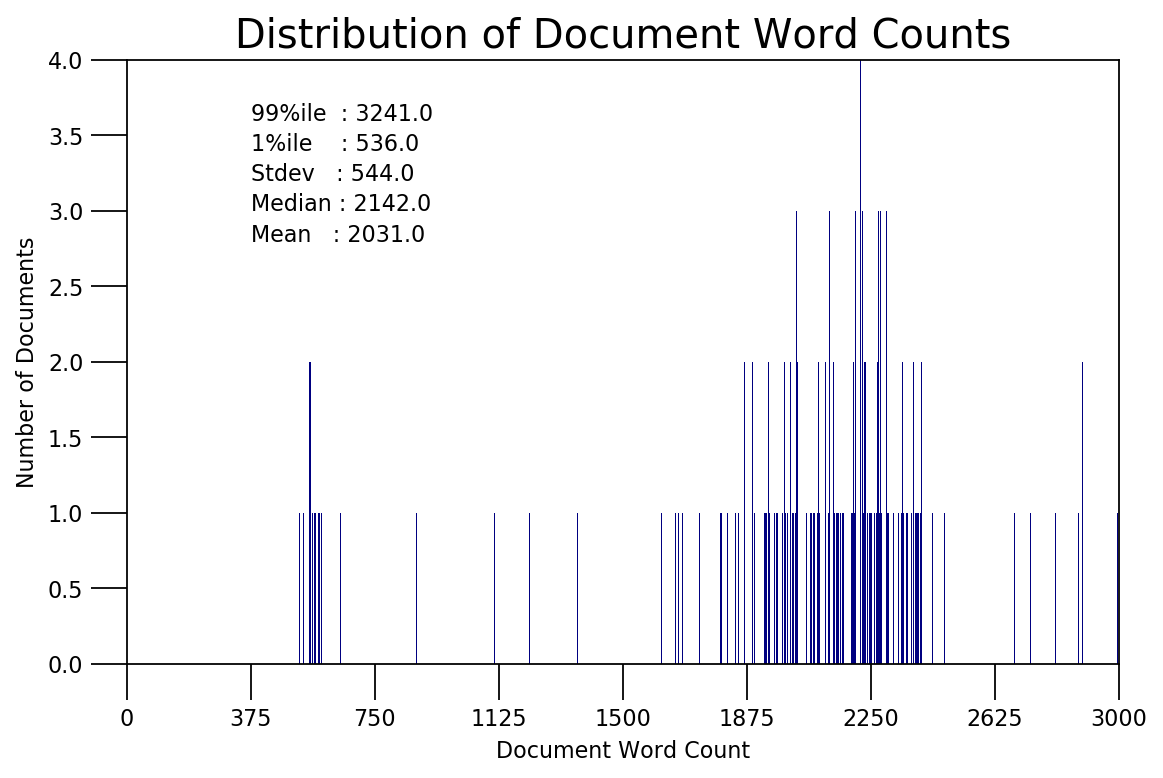

In [32]:
doc_lens = [len(d) for d in df_dominant_topic.Text]

# Plot
plt.figure(figsize=(8,5), dpi=160)
plt.hist(doc_lens,bins=1500, color='navy')
plt.text(375, 2.8, "Mean   : " + str(round(np.mean(doc_lens))))
plt.text(375, 3.0, "Median : " + str(round(np.median(doc_lens))))
plt.text(375, 3.2, "Stdev   : " + str(round(np.std(doc_lens))))
plt.text(375, 3.4, "1%ile    : " + str(round(np.quantile(doc_lens, q=0.01))))
plt.text(375, 3.6, "99%ile  : " + str(round(np.quantile(doc_lens, q=0.99))))

plt.gca().set(xlim=(0, 3000),ylim=(0,4), ylabel='Number of Documents', xlabel='Document Word Count')
plt.tick_params(size=16)
plt.xticks(np.linspace(0,3000,9))
plt.title('Distribution of Document Word Counts', fontdict=dict(size=18))
plt.show()

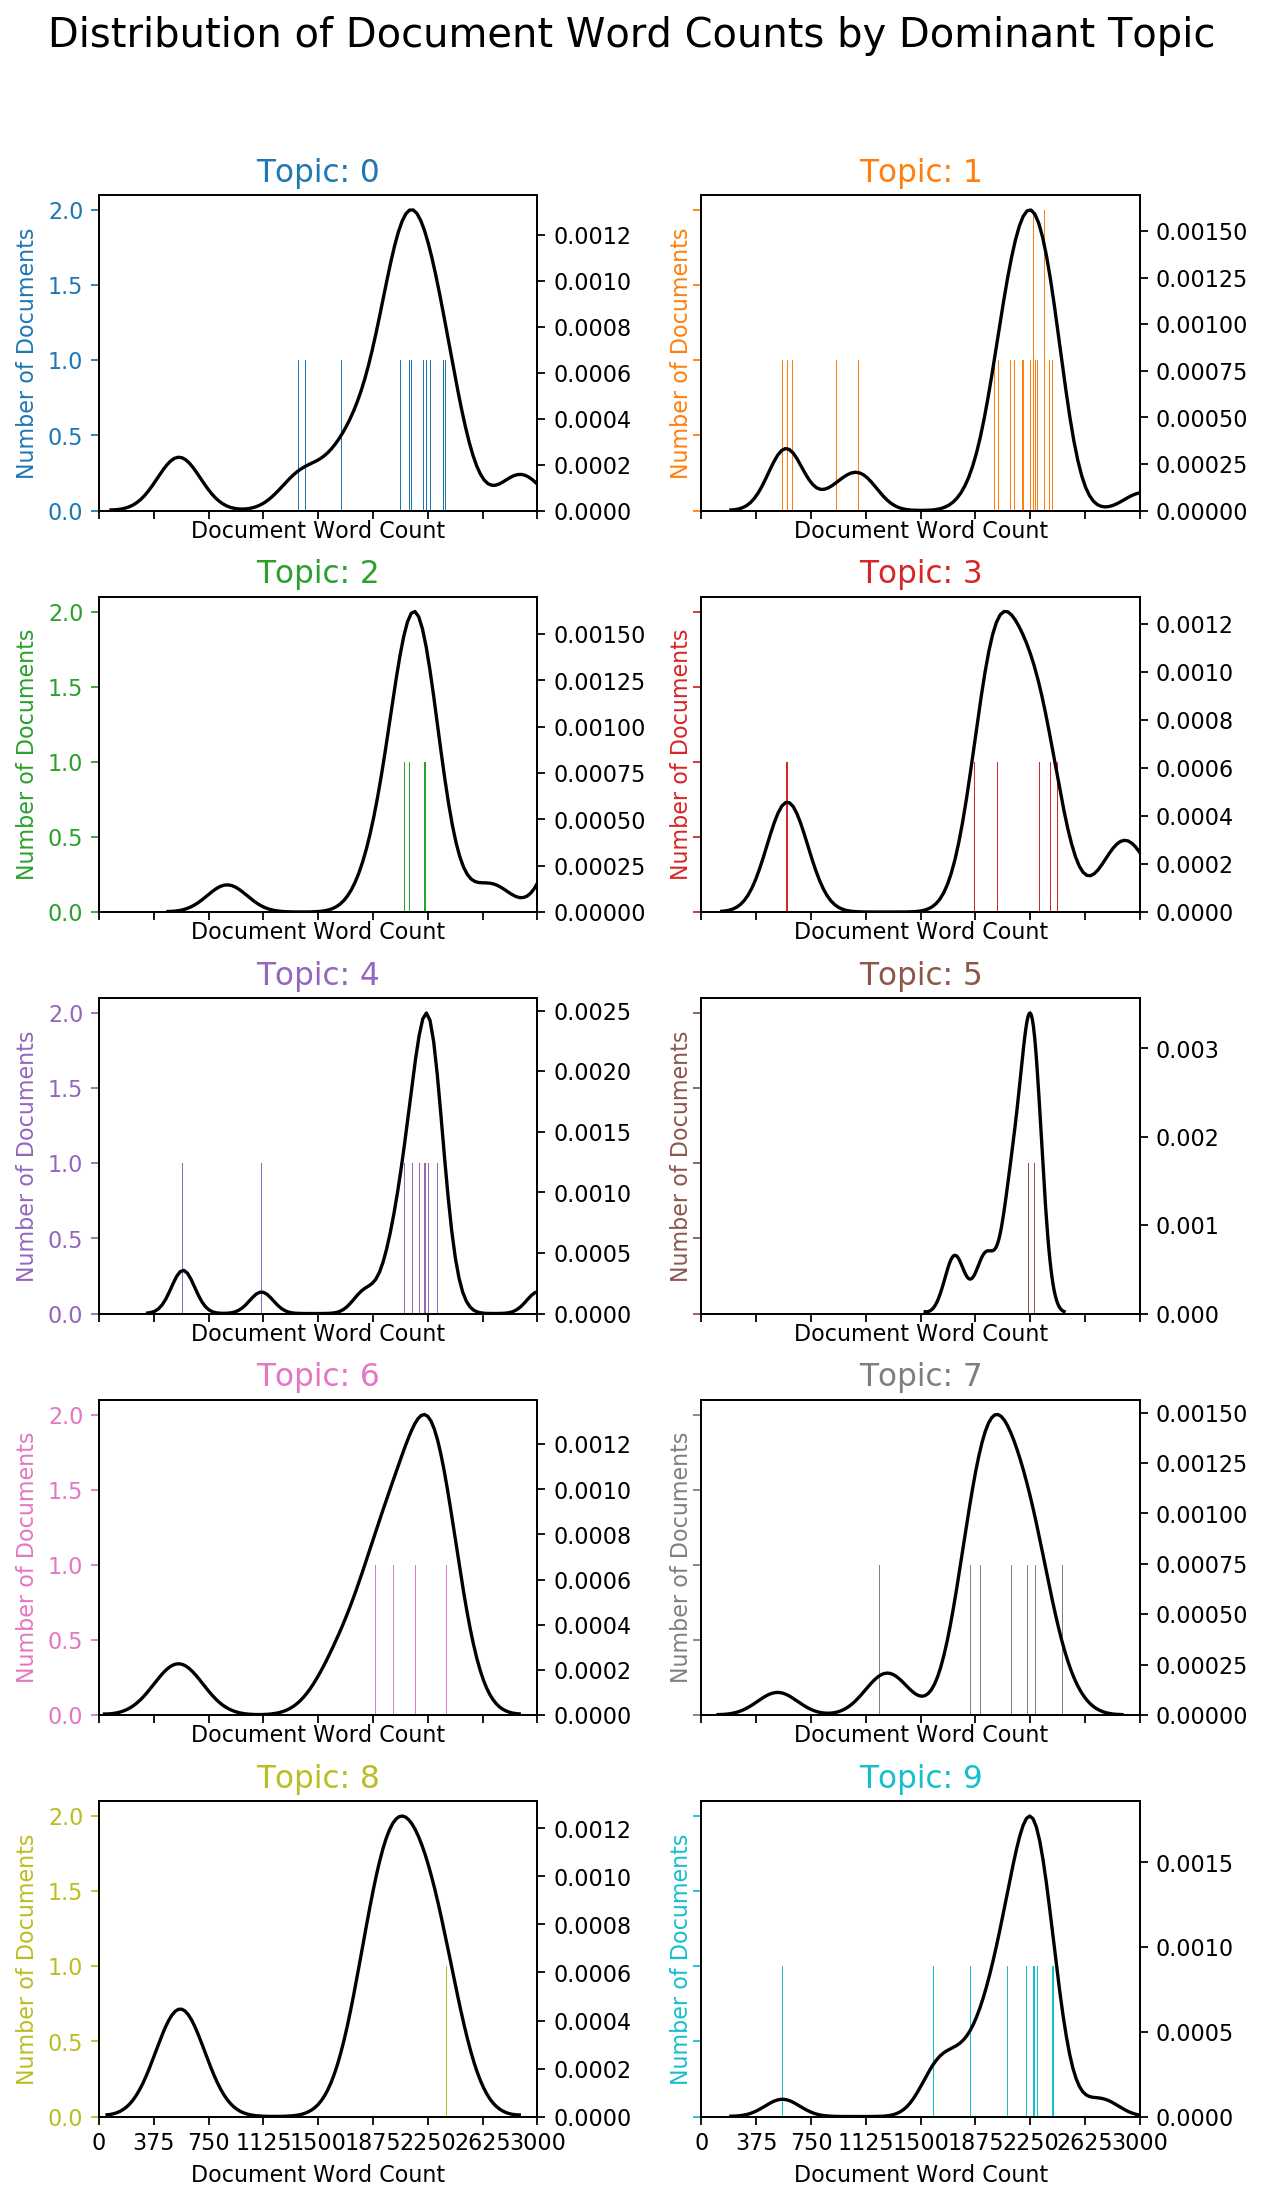

In [33]:
import seaborn as sns
import matplotlib.colors as mcolors
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

fig, axes = plt.subplots(5,2,figsize=(8,14), dpi=160, sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):    
    df_dominant_topic_sub = df_dominant_topic.loc[df_dominant_topic.Dominant_Topic == i, :]
    doc_lens = [len(d) for d in df_dominant_topic_sub.Text]
    ax.hist(doc_lens, bins = 1000, color=cols[i])
    ax.tick_params(axis='y', labelcolor=cols[i], color=cols[i])
    sns.kdeplot(doc_lens, color="black", shade=False, ax=ax.twinx())
    ax.set(xlim=(0, 3000), xlabel='Document Word Count')
    ax.set_ylabel('Number of Documents', color=cols[i])
    ax.set_title('Topic: '+str(i), fontdict=dict(size=14, color=cols[i]))

fig.tight_layout()
fig.subplots_adjust(top=0.90)
plt.xticks(np.linspace(0,3000,9))
fig.suptitle('Distribution of Document Word Counts by Dominant Topic', fontsize=18)
plt.show()

### Word Clouds of Top N Keywords in Each Topic

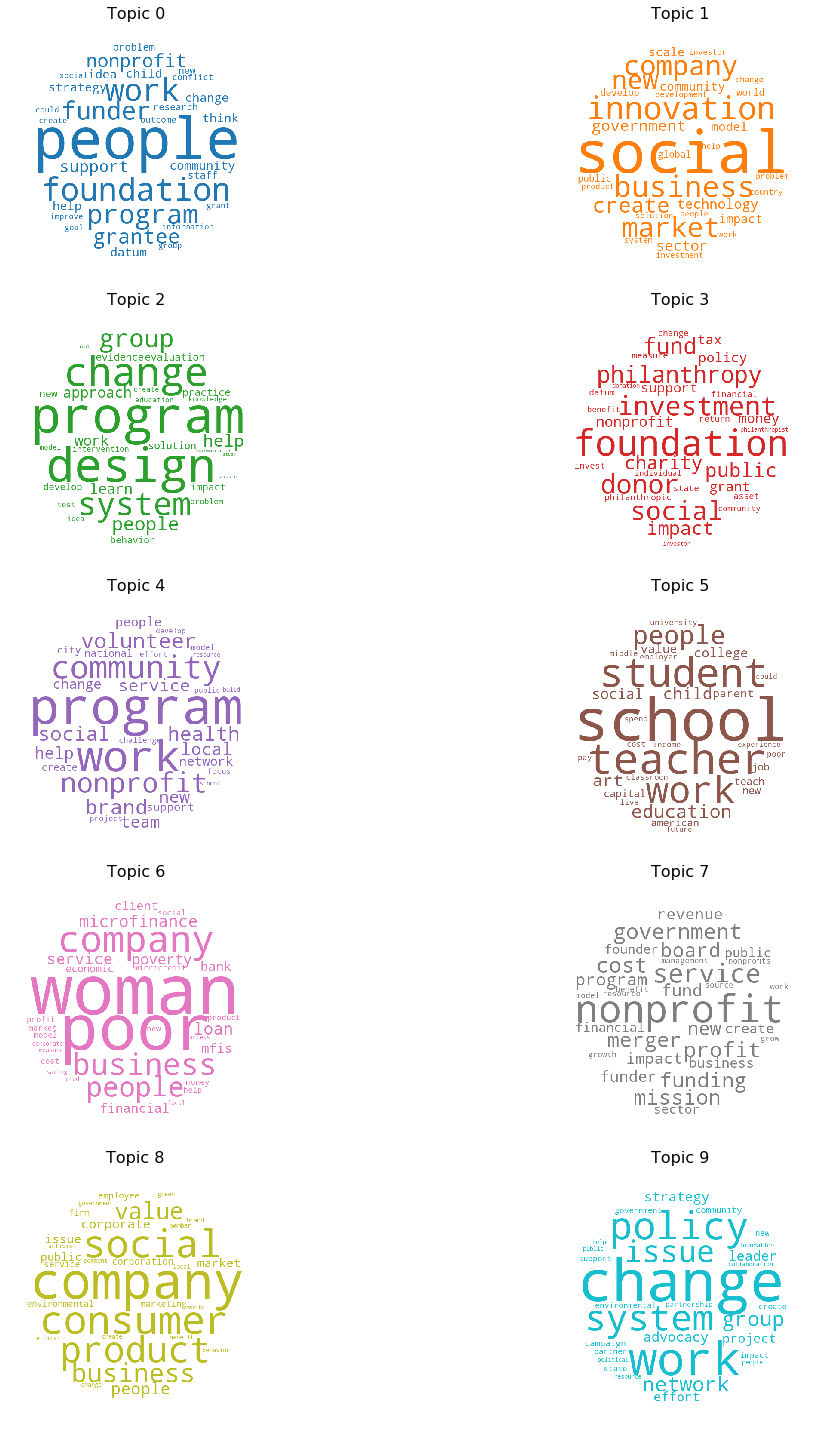

In [34]:
# Wordcloud of Top N words in each topic
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors


x, y = np.ogrid[:300, :300]
mask = (x - 150) ** 2 + (y - 150) ** 2 > 130 ** 2
mask = 255 * mask.astype(int)

# more colors: 'mcolors.XKCD_COLORS'
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]

cloud = WordCloud(stopwords=stop_words,
                  background_color='white',
                 # width=3000,
                  #height=2000,
                  max_words=500,
                  mask=mask,
                  colormap='tab15',
                  max_font_size=16,
                  min_font_size=3,
                  scale=2,
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = lda_model.show_topics(num_words=30, formatted=False)
# print(topics)

fig, axes = plt.subplots(5, 2, figsize=(20, 20), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')

plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()

### Word Counts of Topic Keywords

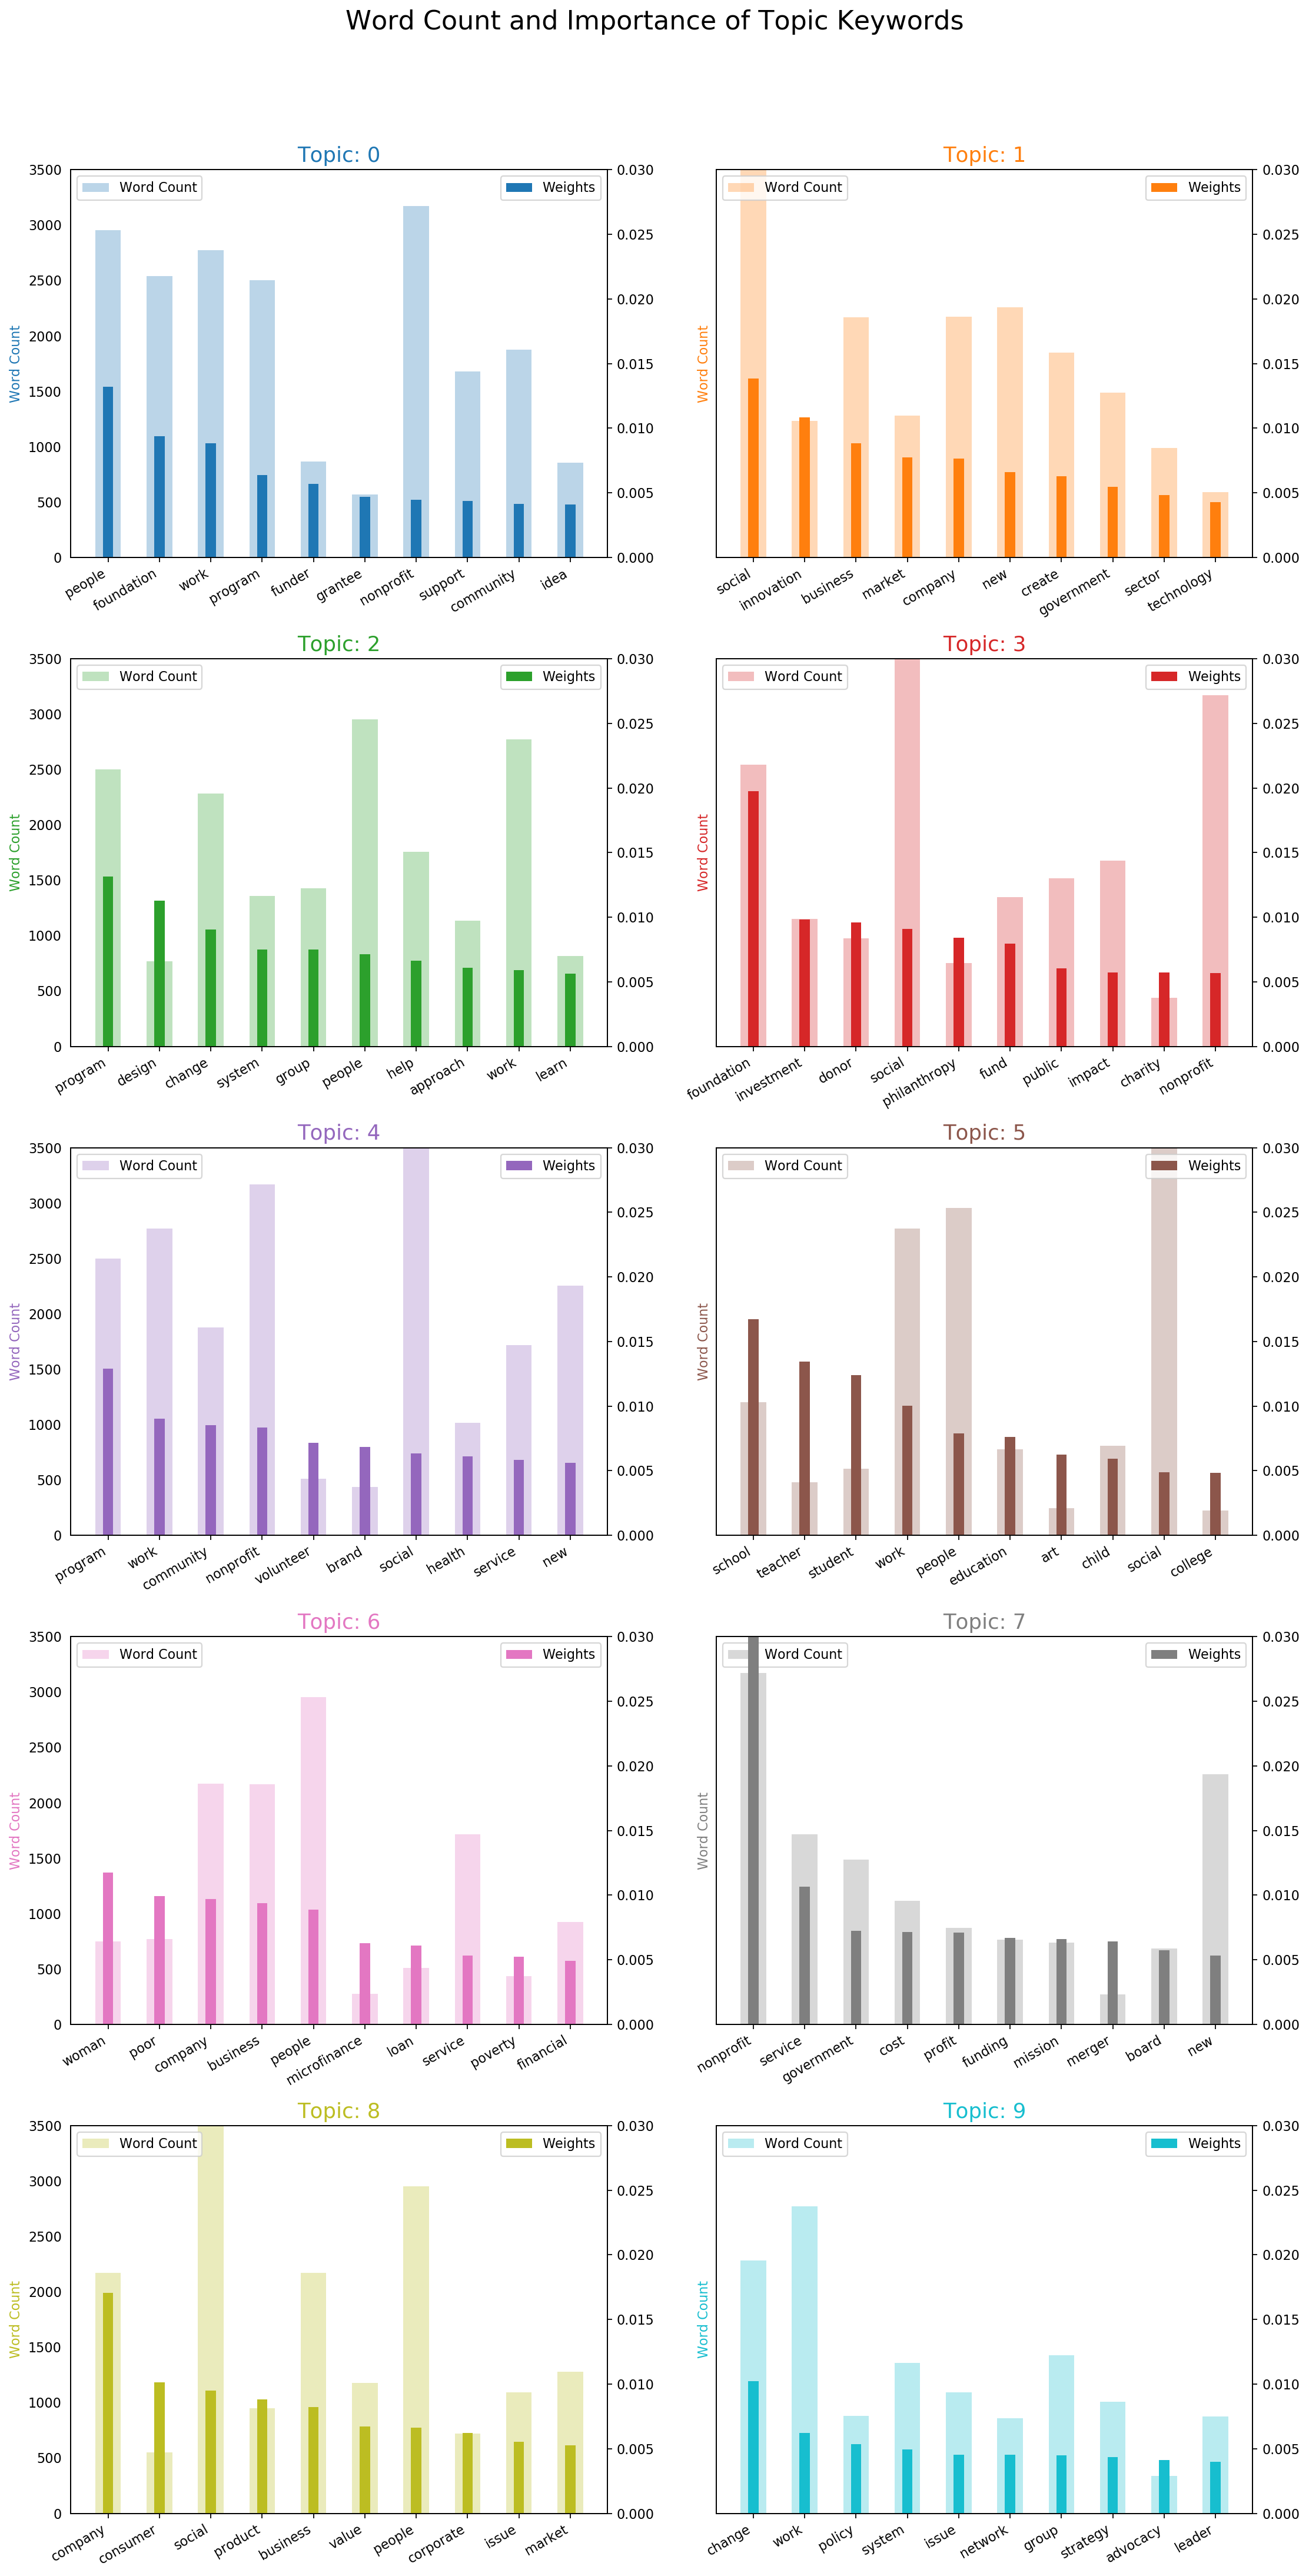

In [35]:
from collections import Counter
topics = lda_model.show_topics(formatted=False)
data_flat = [w for w_list in data_lemmatized for w in w_list]
counter = Counter(data_flat)

out = []
for i, topic in topics:
    for word, weight in topic:
        out.append([word, i , weight, counter[word]])

df = pd.DataFrame(out, columns=['word', 'topic_id', 'importance', 'word_count'])        

# Plot Word Count and Weights of Topic Keywords
fig, axes = plt.subplots(5, 2, figsize=(14,26), sharey=True, dpi=160)
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]
for i, ax in enumerate(axes.flatten()):
    ax.bar(x='word', height="word_count", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.5, alpha=0.3, label='Word Count')
    ax_twin = ax.twinx()
    ax_twin.bar(x='word', height="importance", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.2, label='Weights')
    ax.set_ylabel('Word Count', color=cols[i])
    ax_twin.set_ylim(0, 0.030); ax.set_ylim(0, 3500)
    ax.set_title('Topic: ' + str(i), color=cols[i], fontsize=16)
    ax.tick_params(axis='y', left=False)
    ax.set_xticklabels(df.loc[df.topic_id==i, 'word'], rotation=30, horizontalalignment= 'right')
    ax.legend(loc='upper left'); ax_twin.legend(loc='upper right')

fig.tight_layout(w_pad=2)    
fig.suptitle('Word Count and Importance of Topic Keywords', fontsize=20, y=1.05)    
plt.show()

### What are the most discussed topics in the documents?

In [36]:
# Sentence Coloring of N Sentences
def topics_per_document(model, corpus, start=0, end=1):
    corpus_sel = corpus[start:end]
    dominant_topics = []
    topic_percentages = []
    for i, corp in enumerate(corpus_sel):
        topic_percs, wordid_topics, wordid_phivalues = model[corp]
        dominant_topic = sorted(topic_percs, key = lambda x: x[1], reverse=True)[0][0]
        dominant_topics.append((i, dominant_topic))
        topic_percentages.append(topic_percs)
    return(dominant_topics, topic_percentages)

dominant_topics, topic_percentages = topics_per_document(model=lda_model, corpus=corpus, end=-1)            

# Distribution of Dominant Topics in Each Document
df = pd.DataFrame(dominant_topics, columns=['Document_Id', 'Dominant_Topic'])
dominant_topic_in_each_doc = df.groupby('Dominant_Topic').size()
df_dominant_topic_in_each_doc = dominant_topic_in_each_doc.to_frame(name='count').reset_index()

# Total Topic Distribution by actual weight
topic_weightage_by_doc = pd.DataFrame([dict(t) for t in topic_percentages])
df_topic_weightage_by_doc = topic_weightage_by_doc.sum().to_frame(name='count').reset_index()

# Top 3 Keywords for each Topic
topic_top3words = [(i, topic) for i, topics in lda_model.show_topics(formatted=False) 
                                 for j, (topic, wt) in enumerate(topics) if j < 3]

df_top3words_stacked = pd.DataFrame(topic_top3words, columns=['topic_id', 'words'])
df_top3words = df_top3words_stacked.groupby('topic_id').agg(', \n'.join)
df_top3words.reset_index(level=0,inplace=True)

#### Plot 1: The number of documents for each topic by assigning the document to the topic that has the most weight in that document.
#### Plot 2: The number of documents for each topic by by summing up the actual weight contribution of each topic to respective documents.

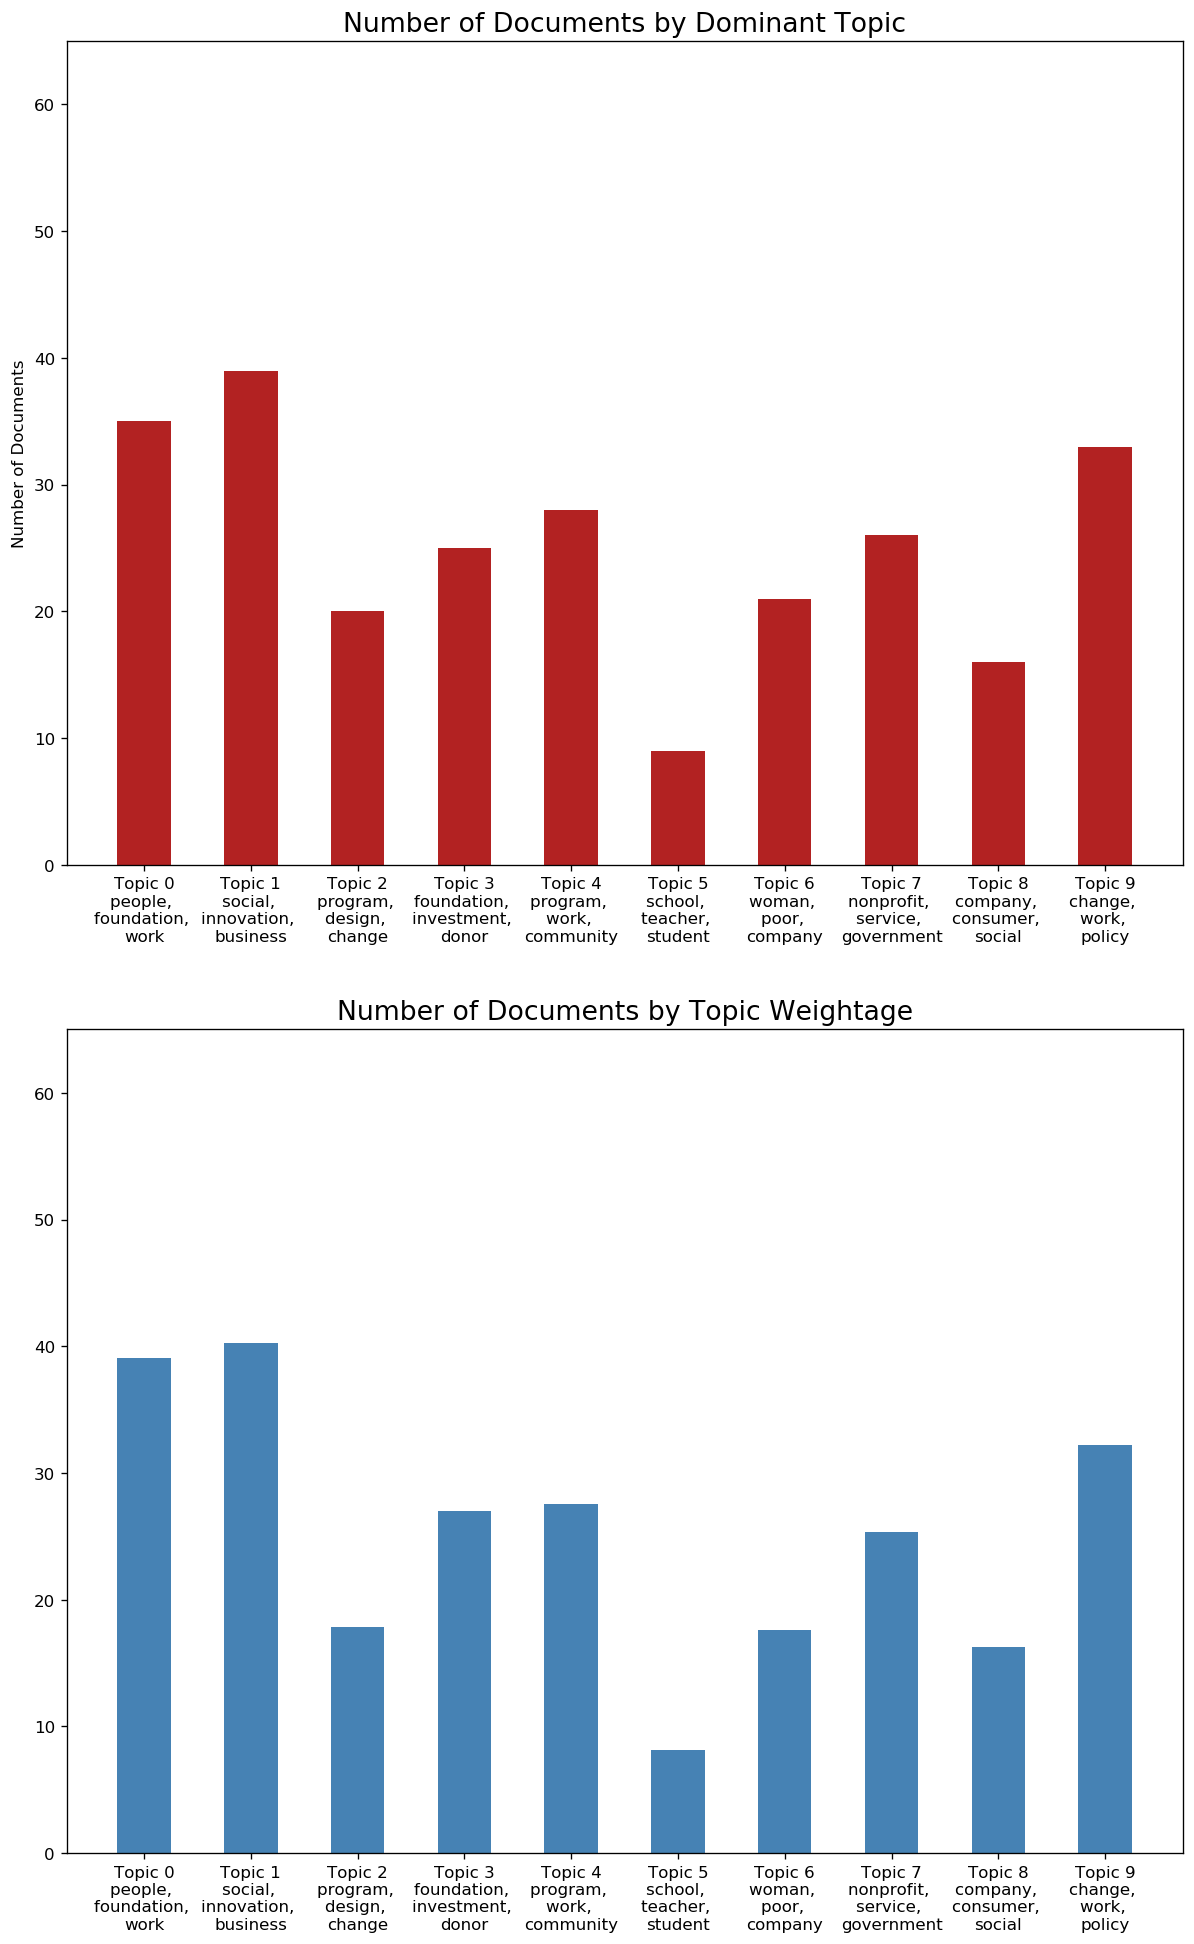

In [37]:
from matplotlib.ticker import FuncFormatter

# Plot
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 20), dpi=120, sharey=True)

# Topic Distribution by Dominant Topics
ax1.bar(x='Dominant_Topic', height='count', data=df_dominant_topic_in_each_doc, width=.5, color='firebrick')
ax1.set_xticks(range(df_dominant_topic_in_each_doc.Dominant_Topic.unique().__len__()))
tick_formatter = FuncFormatter(lambda x, pos: 'Topic ' + str(x)+ '\n' + df_top3words.loc[df_top3words.topic_id==x, 'words'].values[0])
ax1.xaxis.set_major_formatter(tick_formatter)
ax1.set_title('Number of Documents by Dominant Topic', fontdict=dict(size=16))
ax1.set_ylabel('Number of Documents')
ax1.set_ylim(0, 65)

# Topic Distribution by Topic Weights
ax2.bar(x='index', height='count', data=df_topic_weightage_by_doc, width=.5, color='steelblue')
ax2.set_xticks(range(df_topic_weightage_by_doc.index.unique().__len__()))
ax2.xaxis.set_major_formatter(tick_formatter)
ax2.set_title('Number of Documents by Topic Weightage', fontdict=dict(size=16))

plt.show()

### t-SNE Clustering Chart

In [18]:
'''# Get topic weights and dominant topics ------------
from sklearn.manifold import TSNE
from bokeh.plotting import figure, output_file, show
from bokeh.models import Label
from bokeh.io import output_notebook
import matplotlib.colors as mcolors

# Get topic weights
topic_weights = []
for i, row_list in enumerate(lda_model[corpus]):
    topic_weights.append([w for i, w in row_list[0]])

#print(topic_weights)

# Array of topic weights    
arr = pd.DataFrame(topic_weights).fillna(0).values
#print(arr)

# Dominant topic number in each doc
testarr = df_dominant_topic['Dominant_Topic']
testarr = np.array(testarr, dtype=pd.Series)
testarr = testarr.astype(np.int64)

# tSNE Dimension Reduction
tsne_model = TSNE(n_components=2, verbose=1, random_state=0, angle=0.99, init='pca',n_iter=1000)
tsne_lda = tsne_model.fit_transform(arr)

# Plot the Topic Clusters using Bokeh
output_notebook()
n_topics = 10
mycolors = np.array([color for name, color in mcolors.TABLEAU_COLORS.items()])
plot = figure(title="t-SNE Clustering of {} LDA Topics".format(n_topics))
plot.scatter(x=tsne_lda[:,0], y=tsne_lda[:,1], color=mycolors[testarr])
show(plot)
'''

'# Get topic weights and dominant topics ------------\nfrom sklearn.manifold import TSNE\nfrom bokeh.plotting import figure, output_file, show\nfrom bokeh.models import Label\nfrom bokeh.io import output_notebook\nimport matplotlib.colors as mcolors\n\n# Get topic weights\ntopic_weights = []\nfor i, row_list in enumerate(lda_model[corpus]):\n    topic_weights.append([w for i, w in row_list[0]])\n\n#print(topic_weights)\n\n# Array of topic weights    \narr = pd.DataFrame(topic_weights).fillna(0).values\n#print(arr)\n\n# Dominant topic number in each doc\ntestarr = df_dominant_topic[\'Dominant_Topic\']\ntestarr = np.array(testarr, dtype=pd.Series)\ntestarr = testarr.astype(np.int64)\n\n# tSNE Dimension Reduction\ntsne_model = TSNE(n_components=2, verbose=1, random_state=0, angle=0.99, init=\'pca\',n_iter=1000)\ntsne_lda = tsne_model.fit_transform(arr)\n\n# Plot the Topic Clusters using Bokeh\noutput_notebook()\nn_topics = 10\nmycolors = np.array([color for name, color in mcolors.TABLEAU_

In [19]:
'''for i in range(10):
    output_notebook()
    n_topics = i
    mycolors = np.array(['#ff7f0e', '#ff7f0e', '#ff7f0e', '#ff7f0e', '#ff7f0e',
                         '#ff7f0e', '#ff7f0e', '#ff7f0e', '#ff7f0e', '#ff7f0e'], dtype='<U7')
    mycolors[i] = '#1f77b4'
    plot = figure(title="t-SNE Clustering of LDA Topic {} ".format(n_topics))
    plot.scatter(x=tsne_lda[:, 0], y=tsne_lda[:, 1], color=mycolors[testarr])
    show(plot)
'''

'for i in range(10):\n    output_notebook()\n    n_topics = i\n    mycolors = np.array([\'#ff7f0e\', \'#ff7f0e\', \'#ff7f0e\', \'#ff7f0e\', \'#ff7f0e\',\n                         \'#ff7f0e\', \'#ff7f0e\', \'#ff7f0e\', \'#ff7f0e\', \'#ff7f0e\'], dtype=\'<U7\')\n    mycolors[i] = \'#1f77b4\'\n    plot = figure(title="t-SNE Clustering of LDA Topic {} ".format(n_topics))\n    plot.scatter(x=tsne_lda[:, 0], y=tsne_lda[:, 1], color=mycolors[testarr])\n    show(plot)\n'